# Homework 5: Psychophysics

In [37]:
# You must run this cell before starting your assignment

!pip install -q otter-grader

import otter
grader = otter.Notebook("hw5.ipynb")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Investigating the Perception of Size

The data loaded below corresponds to a study investigating human visual perception of size differences in polygons. Ten participants were shown pairs of polygons (triangles, pentagons, heptagons, and nonagons) of different sizes on a screen and asked to identify the larger shape by pressing designated keys on a keyboard.

Data Columns:
- `id` - ID of the individual participant (10 total)
- `polygon` - within-subjects polygon condition (# of sides: 3, 5, 7, or 9)
- `R` - Reference stimulus
- `Rc` - Comparison stimulus
- `correct` - binary: whether (1) or not (0) R and Rc were correctly discriminated

The experiment made use of a stimulus comparison procedure called the **staircase method**, which involves adjusting the comparison polygon size based on the participant's responses. In particular, the comparison polygons in the experiment started at twice the size of their corresponding reference polygons. Each time the participant correctly responded that the polygons were different, the comparison size would be decreased in steps of 10%. If they responded incorrectly, the size would instead be increased.

Trials corresponding to just noticeable differences (JND) are those where **reversals** occurred: when a detectable increase in size occurs as the result of an incorrect response in the previous trial (i.e., when the correct column shows 1 but showed 0 in the previous column). There are exactly two such trials for every combination of participant and polygon condition. Taking the average of `Rc` for these two trials will provide an estimate of the size of the comparison shape needed to allow a detection of a difference.

Within each participant and polygon condition, the rows of the data correspond to the exact order of trials in the original experiment as described in the staircase procedure above.

In [38]:
df = pd.read_csv('jnd_data.csv')
df

,id,polygon,R,Rc,correct
0,1,9,5.5,11.00,1
1,1,9,5.5,10.45,1
2,1,9,5.5,9.90,1
3,1,9,5.5,9.35,1
4,1,9,5.5,8.80,1
...,...,...,...,...,...
3156,10,9,2.0,2.00,0
3157,10,9,2.0,2.20,1
3158,10,9,2.0,2.00,1
3159,10,9,2.0,2.00,0


**Question 1**

For every participant and polygon condition, calculate Weber's constant $k$ for each of the 5 unique reference stimulus sizes (R). Take the average of these to get an overall estimate of $k$ for each participant and polygon condition.

Store your results in a table called `k_df` with columns `id`, `polygon` and `k`, in that order. There should be exactly 40 rows.

In [39]:
# Your code here

df = df.sort_values(['id', 'polygon', 'R']).reset_index(drop=True)
df['prev'] = df.groupby(['id','polygon','R'])['correct'].shift(1)
df['rev'] = (df['correct'] == 1) & (df['prev'] == 0)

temp = (df[df['rev']].groupby(['id', 'polygon', 'R'], as_index=False)['Rc'].mean())

temp['JND'] = temp['Rc'] - temp['R']

temp['k'] = temp['JND'] / temp['R']

jnd_df = (temp.groupby(['id', 'polygon'], as_index=False)['k'].mean())

# Do not edit this code!
k_df = jnd_df.sort_values(['id', 'polygon']).reset_index(drop=True)
k_df

,id,polygon,k
0,1,3,0.15
1,1,5,0.11
2,1,7,0.15
3,1,9,0.16
4,2,3,0.11
5,2,5,0.20
6,2,7,0.18
7,2,9,0.11
8,3,3,0.19
9,3,5,0.21


In [40]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2**

For every participant and polygon condition, use your estimated $k$ values from above to calculate 10 consecutive JNDs on the size scale (each new R value is the previous R value + the JND you had calculated for it), starting from the smallest reference R in the experiment.

Store your results in a table called `f_df` with exactly 40 rows and with exactly the ordered columns:
```python
"id", "polygon", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"
```

Each column represents one sensation unit. The "0" column always corresponds to the smallest reference R, which is the same for all participants and polygon conditions.

In [41]:
# Your code here

rows = []

for _, row in k_df.iterrows():
    k = row["k"]

    sizes = [0.5]

    for _ in range(10):
        next_size = sizes[-1] * (1 + k)
        sizes.append(next_size)

    row_dict = {
        "id": row["id"],
        "polygon": row["polygon"]
    }

    for j, size_val in enumerate(sizes):
        row_dict[str(j)] = size_val

    rows.append(row_dict)

f_df = pd.DataFrame(rows)

# Do not edit this code!
f_df = f_df.sort_values(['id', 'polygon']).reset_index(drop=True)
f_df

,id,polygon,0,1,2,3,4,5,6,7,8,9,10
0,1.0,3.0,0.5,0.575,0.66125,0.760438,0.874503,1.005679,1.156530,1.330010,1.529511,1.758938,2.022779
1,1.0,5.0,0.5,0.555,0.61605,0.683816,0.759035,0.842529,0.935207,1.038080,1.152269,1.279018,1.419710
2,1.0,7.0,0.5,0.575,0.66125,0.760438,0.874503,1.005679,1.156530,1.330010,1.529511,1.758938,2.022779
3,1.0,9.0,0.5,0.580,0.67280,0.780448,0.905320,1.050171,1.218198,1.413110,1.639207,1.901481,2.205718
4,2.0,3.0,0.5,0.555,0.61605,0.683816,0.759035,0.842529,0.935207,1.038080,1.152269,1.279018,1.419710
5,2.0,5.0,0.5,0.600,0.72000,0.864000,1.036800,1.244160,1.492992,1.791590,2.149908,2.579890,3.095868
6,2.0,7.0,0.5,0.590,0.69620,0.821516,0.969389,1.143879,1.349777,1.592737,1.879430,2.217727,2.616918
7,2.0,9.0,0.5,0.555,0.61605,0.683816,0.759035,0.842529,0.935207,1.038080,1.152269,1.279018,1.419710
8,3.0,3.0,0.5,0.595,0.70805,0.842579,1.002670,1.193177,1.419880,1.689658,2.010693,2.392724,2.847342
9,3.0,5.0,0.5,0.605,0.73205,0.885780,1.071794,1.296871,1.569214,1.898749,2.297486,2.779959,3.363750


In [42]:
grader.check("q2")

q2 results: All test cases passed!

Run the following code below to create a Fechner-style visualization for the first row of `f_df` and make sure it looks like what you'd expect.

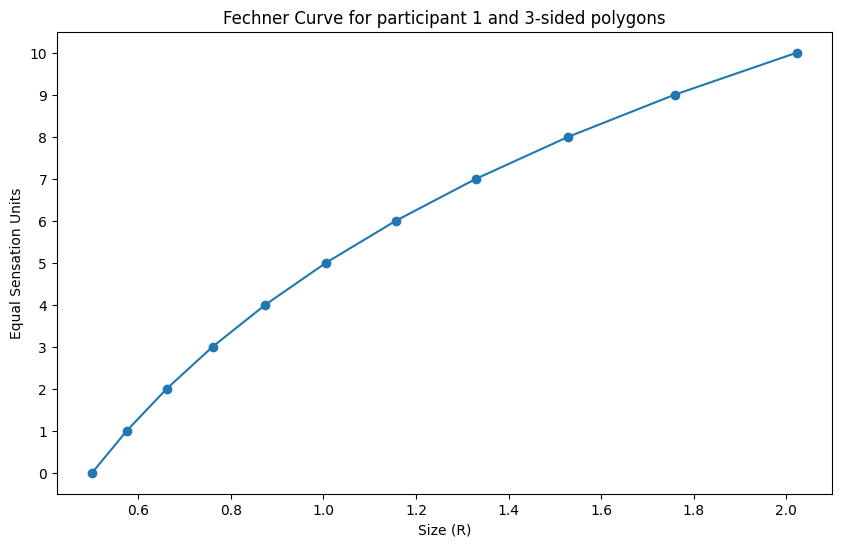

In [43]:
# DO NOT EDIT THIS CELL

plt.figure(figsize=(10, 6))

row = f_df.iloc[0]
sizes = row.index[2:]
values = row[2:]
plt.plot(values, sizes, marker='o', alpha=1.0, label=f'Participant {row["id"]}, Polygon {row["polygon"]}')

plt.ylabel('Equal Sensation Units')
plt.xlabel('Size (R)')
plt.title('Fechner Curve for participant 1 and 3-sided polygons')
plt.show()